Visualización de la información

**Dante Bermúdez Marbán**

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("AnscombeQuartet.txt", sep='\t', header=None)
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [10]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

data.columns = header
data.index = [1,2,3,4,5,6,7,8,9,10,11]
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [112]:
#data.to_latex('hola.tex')

In [11]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [17]:
from sklearn.linear_model import LinearRegression

def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred

---
**Opinión** 

Me pareció interesante el artículo, especialmente porque yo no consideraba la parte de graficar como herramienta para conocer nuestros datos, sino una manera de exponer los resultados de una manera que no fuera el mero resultado numérico. Antes pensaba que estos cálculos de la estadística descriptivia eran suficientes para conocer el conjunto de datos con el que se está trabajando, sin embargo, con el ejemplo mostrado, me queda clarísimo que la graficación puede ser bastante útil para conocer los datos que tenemos, ya que dichos estadísticos eran muy similares.

In [103]:
def obtener_estadisticos(x,y):
    """x,y: pandas.Series"""
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    
    μ_x = np.mean(x)
    var_x = np.var(x)
    
    μ_y = np.mean(y)
    var_y = np.var(y)
    
    modelo_lineal = LinearRegression()
    modelo_lineal.fit(x, y)
    β_0 = modelo_lineal.intercept_[0]
    β_1 = modelo_lineal.coef_[0,0]
    r2 = modelo_lineal.score(x,y)
    
    estadisticos = {"media_x":μ_x, "var_x":var_x,
                    "media_y":μ_y, "var_y":var_y, 
                    "$β_0$":β_0, "$β_1$":β_1, "$r^2$":r2}
    
    return estadisticos

In [229]:
def mostrar_info(ax, i, x, y, x_pred, y_pred, estadisticos):
    ax.scatter(x, y, marker = 's', c="cyan", s=75, edgecolor="blue")
    ax.plot(x_pred, y_pred, color="m", ls=":")

    ax.set_title(f"Dataset {i//2 + 1}", fontsize=20)
    
    ax.set_xlabel(f"$x_{i}$",fontsize=15)
    ax.set_xlim(2,20)
    
    ax.set_ylabel(f"$y_{i}$",fontsize=15)
    ax.set_aspect(aspect=1.0)
    
    ax.grid(True)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    μ_x, var_x, μ_y, var_y, β_0, β_1, r2 = estadisticos.values()
        
    texto = f"""y = {β_0:.3f} + {β_1:.2f}x \t $r^2$ = {r2:.2f}
    x: media = {μ_x}    varianza = {var_x}
    y: media = {μ_y:.2f}    varianza = {var_y:.2f}"""
    
    ax.text(15,5, texto, ha="center", va="center", fontsize=14,
           bbox={"facecolor":"red", "boxstyle":"round",
                 "alpha":0.5,"pad":0.5})

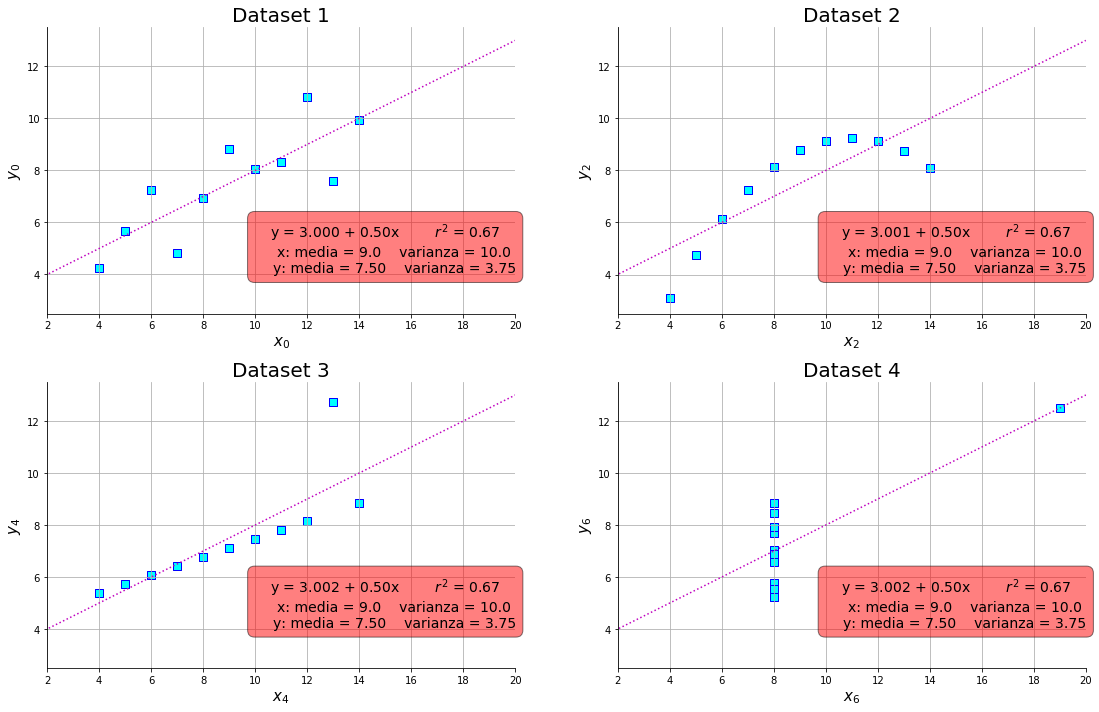

In [230]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

i = 0 # indice de la columa x
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        estadisticos = obtener_estadisticos(X,Y)
        mostrar_info(ax,i,X, Y, X_pred, Y_pred,estadisticos)
        i += 2

plt.tight_layout()